In [1]:
# generic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# notebook settings
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2 
# precision and plot settings
num_precision = 3
np.set_printoptions(precision=num_precision, suppress=True)
pd.set_option('display.float_format', lambda x: f'{x:,.{num_precision}f}')
pd.set_option("display.precision", num_precision)
pd.set_option('display.max_columns', None)

plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

In [2]:
import random, time
import googlemaps

In [3]:
# setup dir and import helper functions
import sys, os
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'src'))
import helper_funcs as my_funcs

In [78]:
# US, 7 categories
closed = pd.read_csv('../data/iOverlander Places -  closed US 7 cats 2020-09-14.csv')
deleted = pd.read_csv('../data/iOverlander Places - US deleted 2020-09-14.csv')
clos_del = pd.read_csv('../data/iOverlander Places - closed and deleted 2020-09-14.csv')

In [5]:
closed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   154 non-null    object 
 1   Name                       681 non-null    object 
 2   Category                   681 non-null    object 
 3   Description                681 non-null    object 
 4   Latitude                   681 non-null    float64
 5   Longitude                  681 non-null    float64
 6   Altitude                   670 non-null    float64
 7   Date verified              681 non-null    object 
 8   Open                       681 non-null    object 
 9   Electricity                661 non-null    object 
 10  Wifi                       661 non-null    object 
 11  Kitchen                    661 non-null    object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 661 non-null    object 

In [79]:
dfs = [closed, deleted, clos_del]

In [7]:
# are these unique?
clos_set = set(closed['Name'])
del_set = set(deleted['Name'])
clos_del_set = set(clos_del['Name'])

In [8]:
clos_set.intersection(del_set)

{'Albertsons',
 'Cabellas',
 'Camping World',
 'Dead end road',
 'Parking for overnight',
 'Parking lot ',
 'Planet Fitness ',
 'Rest Area',
 'Rest area',
 'Saddle Mountain',
 'Street parking ',
 'Super Walmart ',
 'Walmart',
 'Walmart ',
 'Walmart Supercenter',
 'Walmart camping',
 'Walmart parking lot',
 'walmart'}

In [9]:
closed['latlong'] = closed['Latitude'].astype('str') + '_' + closed['Longitude'].astype('str')

In [10]:
def foo(df):
    df['latlong'] = df['Latitude'].astype('str') + '_' + df['Longitude'].astype('str')
    return df

In [11]:
dfs2 = [df.pipe(foo) for df in dfs]

In [12]:
# are these unique?
clos_set = set(dfs2[0]['latlong'])
del_set = set(dfs2[1]['latlong'])
clos_del_set = set(dfs2[2]['latlong'])

In [13]:
clos_set & del_set & clos_del_set

set()

In [14]:
# get states and zips for them
# setup API
G_MAPS_API = os.environ.get("GOOGLE_STATICMAPS_API")
gmaps = googlemaps.Client(G_MAPS_API)
n_requests = 0

In [80]:
names = ['closed', 'deleted', 'closed_deleted']

In [16]:
len(dfs)

3

In [17]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   154 non-null    object 
 1   Name                       681 non-null    object 
 2   Category                   681 non-null    object 
 3   Description                681 non-null    object 
 4   Latitude                   681 non-null    float64
 5   Longitude                  681 non-null    float64
 6   Altitude                   670 non-null    float64
 7   Date verified              681 non-null    object 
 8   Open                       681 non-null    object 
 9   Electricity                661 non-null    object 
 10  Wifi                       661 non-null    object 
 11  Kitchen                    661 non-null    object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 661 non-null    object 

In [18]:
for name, df in zip(names, dfs):
    zips, states = my_funcs.get_state_zip(df, gmaps, n_requests)
    zips_pd = pd.Series(zips, name='zip_codes') 
    states_pd = pd.Series(states, name='states') 
    zips_pd.to_csv(f'../data/zip_codes_{name}.csv')
    states_pd.to_csv(f'../data/states_{name}.csv')

Pulling request 0, total API requests so far = 0
waiting for: 1 seconds
Pulling request 1, total API requests so far = 1
waiting for: 3 seconds
Pulling request 2, total API requests so far = 2
waiting for: 3 seconds
Pulling request 3, total API requests so far = 3
waiting for: 3 seconds
Pulling request 4, total API requests so far = 4
waiting for: 3 seconds
Pulling request 5, total API requests so far = 5
waiting for: 2 seconds
Pulling request 6, total API requests so far = 6
waiting for: 3 seconds
Pulling request 7, total API requests so far = 7
waiting for: 3 seconds
Pulling request 8, total API requests so far = 8
waiting for: 2 seconds
Pulling request 9, total API requests so far = 9
waiting for: 1 seconds
Pulling request 10, total API requests so far = 10
waiting for: 3 seconds
Pulling request 11, total API requests so far = 11
waiting for: 3 seconds
Pulling request 12, total API requests so far = 12
waiting for: 1 seconds
Pulling request 13, total API requests so far = 13
waiting

Pulling request 111, total API requests so far = 111
waiting for: 3 seconds
Pulling request 112, total API requests so far = 112
waiting for: 1 seconds
Pulling request 113, total API requests so far = 113
waiting for: 1 seconds
Pulling request 114, total API requests so far = 114
waiting for: 3 seconds
Pulling request 115, total API requests so far = 115
waiting for: 2 seconds
Pulling request 116, total API requests so far = 116
waiting for: 3 seconds
Pulling request 117, total API requests so far = 117
waiting for: 1 seconds
Pulling request 118, total API requests so far = 118
waiting for: 3 seconds
Pulling request 119, total API requests so far = 119
waiting for: 2 seconds
Pulling request 120, total API requests so far = 120
waiting for: 3 seconds
Pulling request 121, total API requests so far = 121
waiting for: 1 seconds
Pulling request 122, total API requests so far = 122
waiting for: 3 seconds
Pulling request 123, total API requests so far = 123
waiting for: 2 seconds
Pulling requ

Pulling request 219, total API requests so far = 219
waiting for: 2 seconds
Pulling request 220, total API requests so far = 220
waiting for: 3 seconds
Pulling request 221, total API requests so far = 221
waiting for: 2 seconds
Pulling request 222, total API requests so far = 222
waiting for: 2 seconds
Pulling request 223, total API requests so far = 223
waiting for: 3 seconds
Pulling request 224, total API requests so far = 224
waiting for: 1 seconds
Pulling request 225, total API requests so far = 225
waiting for: 2 seconds
Pulling request 226, total API requests so far = 226
waiting for: 1 seconds
Pulling request 227, total API requests so far = 227
waiting for: 3 seconds
Pulling request 228, total API requests so far = 228
waiting for: 3 seconds
Pulling request 229, total API requests so far = 229
waiting for: 2 seconds
Pulling request 230, total API requests so far = 230
waiting for: 1 seconds
Pulling request 231, total API requests so far = 231
waiting for: 2 seconds
Pulling requ

Pulling request 327, total API requests so far = 327
waiting for: 1 seconds
Pulling request 328, total API requests so far = 328
waiting for: 2 seconds
Pulling request 329, total API requests so far = 329
waiting for: 3 seconds
Pulling request 330, total API requests so far = 330
waiting for: 2 seconds
Pulling request 331, total API requests so far = 331
waiting for: 1 seconds
Pulling request 332, total API requests so far = 332
waiting for: 2 seconds
Pulling request 333, total API requests so far = 333
waiting for: 2 seconds
Pulling request 334, total API requests so far = 334
waiting for: 2 seconds
Pulling request 335, total API requests so far = 335
waiting for: 2 seconds
Pulling request 336, total API requests so far = 336
waiting for: 2 seconds
Pulling request 337, total API requests so far = 337
waiting for: 2 seconds
Pulling request 338, total API requests so far = 338
waiting for: 2 seconds
Pulling request 339, total API requests so far = 339
waiting for: 3 seconds
Pulling requ

Pulling request 435, total API requests so far = 435
waiting for: 1 seconds
Pulling request 436, total API requests so far = 436
waiting for: 1 seconds
Pulling request 437, total API requests so far = 437
waiting for: 3 seconds
Pulling request 438, total API requests so far = 438
waiting for: 3 seconds
Pulling request 439, total API requests so far = 439
waiting for: 1 seconds
Pulling request 440, total API requests so far = 440
waiting for: 1 seconds
Pulling request 441, total API requests so far = 441
waiting for: 1 seconds
Pulling request 442, total API requests so far = 442
waiting for: 2 seconds
Pulling request 443, total API requests so far = 443
waiting for: 3 seconds
Pulling request 444, total API requests so far = 444
waiting for: 1 seconds
Pulling request 445, total API requests so far = 445
waiting for: 1 seconds
Pulling request 446, total API requests so far = 446
waiting for: 2 seconds
Pulling request 447, total API requests so far = 447
waiting for: 1 seconds
Pulling requ

Pulling request 543, total API requests so far = 543
waiting for: 2 seconds
Pulling request 544, total API requests so far = 544
waiting for: 3 seconds
Pulling request 545, total API requests so far = 545
waiting for: 2 seconds
Pulling request 546, total API requests so far = 546
waiting for: 2 seconds
Pulling request 547, total API requests so far = 547
waiting for: 2 seconds
Pulling request 548, total API requests so far = 548
waiting for: 2 seconds
Pulling request 549, total API requests so far = 549
waiting for: 2 seconds
Pulling request 550, total API requests so far = 550
waiting for: 1 seconds
Pulling request 551, total API requests so far = 551
waiting for: 3 seconds
Pulling request 552, total API requests so far = 552
waiting for: 1 seconds
Pulling request 553, total API requests so far = 553
waiting for: 1 seconds
Pulling request 554, total API requests so far = 554
waiting for: 2 seconds
Pulling request 555, total API requests so far = 555
waiting for: 2 seconds
Pulling requ

Pulling request 651, total API requests so far = 651
waiting for: 2 seconds
Pulling request 652, total API requests so far = 652
waiting for: 3 seconds
Pulling request 653, total API requests so far = 653
waiting for: 1 seconds
Pulling request 654, total API requests so far = 654
waiting for: 1 seconds
Pulling request 655, total API requests so far = 655
waiting for: 3 seconds
Pulling request 656, total API requests so far = 656
waiting for: 2 seconds
Pulling request 657, total API requests so far = 657
waiting for: 2 seconds
Pulling request 658, total API requests so far = 658
waiting for: 1 seconds
Pulling request 659, total API requests so far = 659
waiting for: 3 seconds
Pulling request 660, total API requests so far = 660
waiting for: 3 seconds
Pulling request 661, total API requests so far = 661
waiting for: 2 seconds
Pulling request 662, total API requests so far = 662
waiting for: 1 seconds
Pulling request 663, total API requests so far = 663
waiting for: 3 seconds
Pulling requ

Pulling request 81, total API requests so far = 81
waiting for: 3 seconds
Pulling request 82, total API requests so far = 82
waiting for: 3 seconds
Pulling request 83, total API requests so far = 83
waiting for: 3 seconds
Pulling request 84, total API requests so far = 84
waiting for: 3 seconds
Pulling request 85, total API requests so far = 85
waiting for: 2 seconds
Pulling request 86, total API requests so far = 86
waiting for: 3 seconds
Pulling request 87, total API requests so far = 87
waiting for: 2 seconds
Pulling request 88, total API requests so far = 88
waiting for: 2 seconds
Pulling request 89, total API requests so far = 89
waiting for: 3 seconds
Pulling request 90, total API requests so far = 90
waiting for: 3 seconds
Pulling request 91, total API requests so far = 91
waiting for: 3 seconds
Pulling request 92, total API requests so far = 92
waiting for: 2 seconds
Pulling request 93, total API requests so far = 93
waiting for: 3 seconds
Pulling request 94, total API requests

Pulling request 190, total API requests so far = 190
waiting for: 1 seconds
Pulling request 191, total API requests so far = 191
waiting for: 2 seconds
Pulling request 192, total API requests so far = 192
waiting for: 1 seconds
Pulling request 193, total API requests so far = 193
waiting for: 2 seconds
Pulling request 194, total API requests so far = 194
waiting for: 1 seconds
Pulling request 195, total API requests so far = 195
waiting for: 1 seconds
Pulling request 196, total API requests so far = 196
waiting for: 1 seconds
Pulling request 197, total API requests so far = 197
waiting for: 2 seconds
Pulling request 198, total API requests so far = 198
waiting for: 2 seconds
Pulling request 199, total API requests so far = 199
waiting for: 1 seconds
Pulling request 200, total API requests so far = 200
waiting for: 3 seconds
Pulling request 201, total API requests so far = 201
waiting for: 1 seconds
Pulling request 202, total API requests so far = 202
waiting for: 1 seconds
Pulling requ

Pulling request 298, total API requests so far = 298
waiting for: 3 seconds
Pulling request 299, total API requests so far = 299
waiting for: 1 seconds
Pulling request 300, total API requests so far = 300
waiting for: 1 seconds
Pulling request 301, total API requests so far = 301
waiting for: 2 seconds
Pulling request 302, total API requests so far = 302
waiting for: 3 seconds
Pulling request 303, total API requests so far = 303
waiting for: 3 seconds
Pulling request 304, total API requests so far = 304
waiting for: 3 seconds
Pulling request 305, total API requests so far = 305
waiting for: 1 seconds
Pulling request 306, total API requests so far = 306
waiting for: 2 seconds
Pulling request 307, total API requests so far = 307
waiting for: 1 seconds
Pulling request 308, total API requests so far = 308
waiting for: 1 seconds
Pulling request 309, total API requests so far = 309
waiting for: 1 seconds
Pulling request 310, total API requests so far = 310
waiting for: 1 seconds
Pulling requ

Pulling request 406, total API requests so far = 406
waiting for: 3 seconds
Pulling request 407, total API requests so far = 407
waiting for: 3 seconds
Pulling request 408, total API requests so far = 408
waiting for: 3 seconds
Pulling request 409, total API requests so far = 409
waiting for: 1 seconds
Pulling request 410, total API requests so far = 410
waiting for: 1 seconds
Pulling request 411, total API requests so far = 411
waiting for: 2 seconds
Pulling request 412, total API requests so far = 412
waiting for: 3 seconds
Pulling request 413, total API requests so far = 413
waiting for: 2 seconds
Pulling request 414, total API requests so far = 414
waiting for: 2 seconds
Pulling request 415, total API requests so far = 415
waiting for: 1 seconds
Pulling request 416, total API requests so far = 416
waiting for: 2 seconds
Pulling request 417, total API requests so far = 417
waiting for: 1 seconds
Pulling request 418, total API requests so far = 418
waiting for: 3 seconds
Pulling requ

Pulling request 514, total API requests so far = 514
waiting for: 1 seconds
Pulling request 515, total API requests so far = 515
waiting for: 1 seconds
Pulling request 516, total API requests so far = 516
waiting for: 2 seconds
Pulling request 517, total API requests so far = 517
waiting for: 1 seconds
Pulling request 518, total API requests so far = 518
waiting for: 1 seconds
Pulling request 519, total API requests so far = 519
waiting for: 1 seconds
Pulling request 520, total API requests so far = 520
waiting for: 1 seconds
Pulling request 521, total API requests so far = 521
waiting for: 2 seconds
Pulling request 522, total API requests so far = 522
waiting for: 1 seconds
Pulling request 523, total API requests so far = 523
waiting for: 2 seconds
Pulling request 524, total API requests so far = 524
waiting for: 2 seconds
Pulling request 525, total API requests so far = 525
waiting for: 2 seconds
Pulling request 526, total API requests so far = 526
waiting for: 1 seconds
Pulling requ

Pulling request 622, total API requests so far = 622
waiting for: 2 seconds
Pulling request 623, total API requests so far = 623
waiting for: 2 seconds
Pulling request 624, total API requests so far = 624
waiting for: 1 seconds
Pulling request 625, total API requests so far = 625
waiting for: 3 seconds
Pulling request 626, total API requests so far = 626
waiting for: 2 seconds
Pulling request 627, total API requests so far = 627
waiting for: 3 seconds
Pulling request 628, total API requests so far = 628
waiting for: 3 seconds
Pulling request 629, total API requests so far = 629
waiting for: 2 seconds
Pulling request 630, total API requests so far = 630
waiting for: 2 seconds
Pulling request 631, total API requests so far = 631
waiting for: 2 seconds
Pulling request 632, total API requests so far = 632
waiting for: 2 seconds
Pulling request 633, total API requests so far = 633
waiting for: 3 seconds
Pulling request 634, total API requests so far = 634
waiting for: 2 seconds
Pulling requ

Pulling request 730, total API requests so far = 730
waiting for: 3 seconds
Pulling request 731, total API requests so far = 731
waiting for: 2 seconds
Pulling request 732, total API requests so far = 732
waiting for: 2 seconds
Pulling request 733, total API requests so far = 733
waiting for: 2 seconds
Pulling request 734, total API requests so far = 734
waiting for: 2 seconds
Pulling request 735, total API requests so far = 735
waiting for: 3 seconds
Pulling request 736, total API requests so far = 736
waiting for: 2 seconds
Pulling request 737, total API requests so far = 737
waiting for: 2 seconds
Pulling request 738, total API requests so far = 738
waiting for: 3 seconds
Pulling request 739, total API requests so far = 739
waiting for: 2 seconds
Pulling request 740, total API requests so far = 740
waiting for: 2 seconds
Pulling request 741, total API requests so far = 741
waiting for: 3 seconds
Pulling request 742, total API requests so far = 742
waiting for: 1 seconds
Pulling requ

Pulling request 838, total API requests so far = 838
waiting for: 1 seconds
Pulling request 839, total API requests so far = 839
waiting for: 2 seconds
Pulling request 840, total API requests so far = 840
waiting for: 3 seconds
Pulling request 841, total API requests so far = 841
waiting for: 2 seconds
Pulling request 842, total API requests so far = 842
waiting for: 1 seconds
Pulling request 843, total API requests so far = 843
waiting for: 3 seconds
Pulling request 844, total API requests so far = 844
waiting for: 2 seconds
Pulling request 845, total API requests so far = 845
waiting for: 1 seconds
Pulling request 846, total API requests so far = 846
waiting for: 3 seconds
Pulling request 847, total API requests so far = 847
waiting for: 1 seconds
Pulling request 848, total API requests so far = 848
waiting for: 3 seconds
Pulling request 849, total API requests so far = 849
waiting for: 2 seconds
Pulling request 850, total API requests so far = 850
waiting for: 1 seconds
Pulling requ

Pulling request 90, total API requests so far = 90
waiting for: 3 seconds
Pulling request 91, total API requests so far = 91
waiting for: 1 seconds
Pulling request 92, total API requests so far = 92
waiting for: 2 seconds
Pulling request 93, total API requests so far = 93
waiting for: 1 seconds
Pulling request 94, total API requests so far = 94
waiting for: 2 seconds
Pulling request 95, total API requests so far = 95
waiting for: 2 seconds
Pulling request 96, total API requests so far = 96
waiting for: 1 seconds
Pulling request 97, total API requests so far = 97
waiting for: 1 seconds
Pulling request 98, total API requests so far = 98
waiting for: 1 seconds
Pulling request 99, total API requests so far = 99
waiting for: 3 seconds
Pulling request 100, total API requests so far = 100
waiting for: 3 seconds
Pulling request 101, total API requests so far = 101
waiting for: 2 seconds
Pulling request 102, total API requests so far = 102
waiting for: 3 seconds
Pulling request 103, total API r

Pulling request 199, total API requests so far = 199
waiting for: 3 seconds
Pulling request 200, total API requests so far = 200
waiting for: 3 seconds
Pulling request 201, total API requests so far = 201
waiting for: 3 seconds
Pulling request 202, total API requests so far = 202
waiting for: 2 seconds
Pulling request 203, total API requests so far = 203
waiting for: 1 seconds
Pulling request 204, total API requests so far = 204
waiting for: 1 seconds
Pulling request 205, total API requests so far = 205
waiting for: 1 seconds
Pulling request 206, total API requests so far = 206
waiting for: 2 seconds
Pulling request 207, total API requests so far = 207
waiting for: 1 seconds
Pulling request 208, total API requests so far = 208
waiting for: 1 seconds
Pulling request 209, total API requests so far = 209
waiting for: 2 seconds
Pulling request 210, total API requests so far = 210
waiting for: 1 seconds
Pulling request 211, total API requests so far = 211
waiting for: 2 seconds
Pulling requ

Pulling request 307, total API requests so far = 307
waiting for: 3 seconds
Pulling request 308, total API requests so far = 308
waiting for: 2 seconds
Pulling request 309, total API requests so far = 309
waiting for: 2 seconds
Pulling request 310, total API requests so far = 310
waiting for: 1 seconds
Pulling request 311, total API requests so far = 311
waiting for: 1 seconds
Pulling request 312, total API requests so far = 312
waiting for: 2 seconds
Pulling request 313, total API requests so far = 313
waiting for: 2 seconds
Pulling request 314, total API requests so far = 314
waiting for: 1 seconds
Pulling request 315, total API requests so far = 315
waiting for: 2 seconds
Pulling request 316, total API requests so far = 316
waiting for: 2 seconds
Pulling request 317, total API requests so far = 317
waiting for: 3 seconds
Pulling request 318, total API requests so far = 318
waiting for: 1 seconds
Pulling request 319, total API requests so far = 319
waiting for: 1 seconds
Pulling requ

Pulling request 415, total API requests so far = 415
waiting for: 3 seconds
Pulling request 416, total API requests so far = 416
waiting for: 3 seconds
Pulling request 417, total API requests so far = 417
waiting for: 2 seconds
Pulling request 418, total API requests so far = 418
waiting for: 2 seconds
Pulling request 419, total API requests so far = 419
waiting for: 3 seconds
Pulling request 420, total API requests so far = 420
waiting for: 3 seconds
Pulling request 421, total API requests so far = 421
waiting for: 3 seconds
Pulling request 422, total API requests so far = 422
waiting for: 1 seconds
Pulling request 423, total API requests so far = 423
waiting for: 2 seconds
Pulling request 424, total API requests so far = 424
waiting for: 1 seconds
Pulling request 425, total API requests so far = 425
waiting for: 1 seconds
Pulling request 426, total API requests so far = 426
waiting for: 1 seconds
Pulling request 427, total API requests so far = 427
waiting for: 1 seconds
Pulling requ

In [81]:
# add the new data as new cols in each
for name, df in zip(names, dfs):
    zips = pd.read_csv(f'../data/zip_codes_{name}.csv').drop('Unnamed: 0',axis=1)
    states = pd.read_csv(f'../data/states_{name}.csv').drop('Unnamed: 0',axis=1)
    df['zip_code'] = zips
    df['State'] = states

In [37]:
# save these
for name, df in zip(names, dfs):
    df.to_csv(f'../data/{name}_US_sites.csv', index=False)

In [39]:
test = dfs[0]

In [43]:
 test['Category'] + '_' + name

0           Informal Campsite_closed_deleted
1                Wild Camping_closed_deleted
2           Informal Campsite_closed_deleted
3      Established Campground_closed_deleted
4                Wild Camping_closed_deleted
                       ...                  
676              Wild Camping_closed_deleted
677    Established Campground_closed_deleted
678              Wild Camping_closed_deleted
679              Wild Camping_closed_deleted
680              Wild Camping_closed_deleted
Name: Category, Length: 681, dtype: object

In [82]:
# merge them and add to category col
for name, df in zip(names, dfs):
    df['Category'] = df['Category'] + '_' + name
#     df.drop('category', axis=1, inplace=True)

In [83]:
closed_del_combined = pd.concat(dfs)

In [52]:
closed_del_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 475
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   568 non-null    object 
 1   Name                       2015 non-null   object 
 2   Category                   2016 non-null   object 
 3   Description                2014 non-null   object 
 4   Latitude                   2016 non-null   float64
 5   Longitude                  2016 non-null   float64
 6   Altitude                   1952 non-null   float64
 7   Date verified              2016 non-null   object 
 8   Open                       2016 non-null   object 
 9   Electricity                1916 non-null   object 
 10  Wifi                       1916 non-null   object 
 11  Kitchen                    1916 non-null   object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 1916 non-null   object

In [84]:
# split into either has state (so can parse the state) or not
closed_del_combined_no_state = closed_del_combined[pd.isna(closed_del_combined['State'])].copy()
closed_del_combined_has_state = closed_del_combined[~pd.isna(closed_del_combined['State'])].copy()

In [85]:
closed_del_combined_no_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 26 to 464
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   22 non-null     object 
 1   Name                       86 non-null     object 
 2   Category                   87 non-null     object 
 3   Description                87 non-null     object 
 4   Latitude                   87 non-null     float64
 5   Longitude                  87 non-null     float64
 6   Altitude                   82 non-null     float64
 7   Date verified              87 non-null     object 
 8   Open                       87 non-null     object 
 9   Electricity                84 non-null     object 
 10  Wifi                       84 non-null     object 
 11  Kitchen                    84 non-null     object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 84 non-null     object 

In [86]:
# only 22, but try anyways
closed_del_combined_no_state = closed_del_combined_no_state[~pd.isna(closed_del_combined_no_state['Location'])].copy()

In [65]:
closed_del_combined_no_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 26 to 138
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   22 non-null     object 
 1   Name                       22 non-null     object 
 2   Category                   22 non-null     object 
 3   Description                22 non-null     object 
 4   Latitude                   22 non-null     float64
 5   Longitude                  22 non-null     float64
 6   Altitude                   19 non-null     float64
 7   Date verified              22 non-null     object 
 8   Open                       22 non-null     object 
 9   Electricity                20 non-null     object 
 10  Wifi                       20 non-null     object 
 11  Kitchen                    20 non-null     object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 20 non-null     object 

In [87]:
# try to parse state
closed_del_combined_no_state = closed_del_combined_no_state[closed_del_combined_no_state['Location'].str.contains('\s[A-Z]{2}\s', case=True, regex=True)]

In [88]:
# put it in state col
closed_del_combined_no_state['State'] = closed_del_combined_no_state['Location'].str.extract(r'(\s[A-Z]{2}\s)')

In [71]:
closed_del_combined_no_state.head()

Location  \
26            Forest Rd 1174, Bryce, UT 84764, USA   
31   Hole in the Rock Rd, Escalante, UT 84726, USA   
55                   CA-190, Darwin, CA 93522, USA   
123           Forest Rd 1173, Bryce, UT 84764, USA   
103   Hartley Springs Rd, June Lake, CA 93529, USA   

                               Name                                Category  \
26         Free Camping In The Wood              Wild Camping_closed_closed   
31                     Free camping              Wild Camping_closed_closed   
55   Vista Point In Death Valley NP         Informal Campsite_closed_closed   
123            Level spot in woods          Informal Campsite_closed_closed   
103          FREE!! camp Nat Forest  Established Campground_deleted_deleted   

                                           Description  Latitude  Longitude  \
26   MODERATOR NOTE: No overnight camping allowed, ...    37.664   -112.166   
31   FREE, no amenities. Place to fire. A frase are...    37.715   -111.515   
55   ADMIN NOTE: Place removed because camping is i...    36.352   -117.550   
123  MODERATOR NOTE: Place removed because camping ...    37.665   -112.168   
103  Free camp in National Forest, dirty road 3km f...    37.772   -119.037   

     Altitude            Date verified Open Electricity Wifi Kitchen  Parking  \
26  2,342.215  2019-09-22 00:00:00 UTC   No          No   No      No      nan   
31  1,707.000  2019-05-11 00:00:00 UTC   No          No   No      No      nan   
55  1,277.212  2019-11-06 00:00:00 UTC   No          No   No      No      nan   
123 2,330.000  2018-10-04 00:00:00 UTC   No          No   No      No      nan   
103 2,554.000  2017-06-14 00:00:00 UTC  Yes          No   No      No      nan   

    Restaurant Showers Water      Toilets Big rig friendly Tent friendly  \
26          No      No    No           No               No            No   
31          No      No    No           No              Yes           Yes   
55          No      No    No  Pit Toilets              Yes            No   
123         No      No    No           No               No            No   
103         No      No    No  Pit Toilets              Yes           Yes   

    Pet friendly Sanitation dump station  Outdoor gear  Groceries  \
26           Yes                     NaN           nan        nan   
31           Yes                     NaN           nan        nan   
55           Yes                     NaN           nan        nan   
123          Yes                     NaN           nan        nan   
103          Yes                 Unknown           nan        nan   

     Artesian goods  Bakery  Rarity in this area  Repairs vehicles  \
26              nan     nan                  nan               nan   
31              nan     nan                  nan               nan   
55              nan     nan                  nan               nan   
123             nan     nan                  nan               nan   
103             nan     nan                  nan               nan   

     Repairs motorcycles  Repairs bicycles  Sells parts  Recycles batteries  \
26                   nan               nan          nan                 nan   
31                   nan               nan          nan                 nan   
55                   nan               nan          nan                 nan   
123                  nan               nan          nan                 nan   
103                  nan               nan          nan                 nan   

     Recycles oil  Bio fuel  Electric vehicle charging  Composting sawdust  \
26            nan       nan                        nan                 nan   
31            nan       nan                        nan                 nan   
55            nan       nan                        nan                 nan   
123           nan       nan                        nan                 nan   
103           nan       nan                        nan                 nan   

     Recycling center                      

In [109]:
closed_del_combined_final = pd.concat([closed_del_combined_has_state, closed_del_combined_no_state])

In [110]:
closed_del_combined_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 0 to 207
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   556 non-null    object 
 1   Name                       1939 non-null   object 
 2   Category                   1939 non-null   object 
 3   Description                1937 non-null   object 
 4   Latitude                   1939 non-null   float64
 5   Longitude                  1939 non-null   float64
 6   Altitude                   1880 non-null   float64
 7   Date verified              1939 non-null   object 
 8   Open                       1939 non-null   object 
 9   Electricity                1841 non-null   object 
 10  Wifi                       1841 non-null   object 
 11  Kitchen                    1841 non-null   object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 1841 non-null   object

In [111]:
categories = list(closed_del_combined_final['Category'].unique())
categories

['Informal Campsite_closed',
 'Wild Camping_closed',
 'Established Campground_closed',
 'Water_closed',
 'Showers_closed',
 'Wild Camping_deleted',
 'Informal Campsite_deleted',
 'Established Campground_deleted',
 'Water_deleted',
 'Informal Campsite_closed_deleted',
 'Wild Camping_closed_deleted',
 'Established Campground_closed_deleted',
 'Water_closed_deleted',
 'Showers_closed_deleted']

In [112]:
closed_del_combined_final['State'].unique()

array(['WA', 'AK', 'CA', 'LA', 'TX', 'WY', 'OR', 'NM', 'AZ', 'WI', 'UT',
       'MT', 'FL', 'OK', 'NV', 'CO', 'MS', 'IL', 'NE', 'TN', 'NH', 'MI',
       'ID', 'AR', 'MO', 'WV', 'NC', 'VA', 'GA', 'MA', 'NJ', 'SC', 'NY',
       'MN', 'IN', 'PE', 'HI', 'ME', 'BC', 'PA', 'OH', 'RI', 'B.C.', 'DC',
       'SD', 'MD', 'NS', 'CT', 'AL', 'IA', 'KS', 'QC', 'KY', 'DE', 'VT',
       'YT', 'MB', 'NL', 'ON', 'Republic of Kalmykia', 'Magadan Oblast',
       ' UT ', ' CA ', ' AK ', ' NV ', ' WA '], dtype=object)

In [113]:
closed_del_combined_final['State'] = closed_del_combined_final['State'].str.strip()

In [114]:
closed_del_combined_final['State'].unique()

array(['WA', 'AK', 'CA', 'LA', 'TX', 'WY', 'OR', 'NM', 'AZ', 'WI', 'UT',
       'MT', 'FL', 'OK', 'NV', 'CO', 'MS', 'IL', 'NE', 'TN', 'NH', 'MI',
       'ID', 'AR', 'MO', 'WV', 'NC', 'VA', 'GA', 'MA', 'NJ', 'SC', 'NY',
       'MN', 'IN', 'PE', 'HI', 'ME', 'BC', 'PA', 'OH', 'RI', 'B.C.', 'DC',
       'SD', 'MD', 'NS', 'CT', 'AL', 'IA', 'KS', 'QC', 'KY', 'DE', 'VT',
       'YT', 'MB', 'NL', 'ON', 'Republic of Kalmykia', 'Magadan Oblast'],
      dtype=object)

In [115]:
# drop some things clearly not US states
closed_del_combined_final = closed_del_combined_final[~closed_del_combined_final['State'].isin(['Republic of Kalmykia', 'Magadan Oblast'])].copy()

In [117]:
closed_del_combined_final['State'].replace('B.C.', 'BC', inplace=True)

In [118]:
closed_del_combined_final['State'].unique()

array(['WA', 'AK', 'CA', 'LA', 'TX', 'WY', 'OR', 'NM', 'AZ', 'WI', 'UT',
       'MT', 'FL', 'OK', 'NV', 'CO', 'MS', 'IL', 'NE', 'TN', 'NH', 'MI',
       'ID', 'AR', 'MO', 'WV', 'NC', 'VA', 'GA', 'MA', 'NJ', 'SC', 'NY',
       'MN', 'IN', 'PE', 'HI', 'ME', 'BC', 'PA', 'OH', 'RI', 'DC', 'SD',
       'MD', 'NS', 'CT', 'AL', 'IA', 'KS', 'QC', 'KY', 'DE', 'VT', 'YT',
       'MB', 'NL', 'ON'], dtype=object)

In [119]:
# save it
# closed_del_combined_final.to_csv('../data/closed_del_combined_final_with_state.csv', index=False)

In [120]:
names = list(closed_del_combined_final['State'].unique())

In [122]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [123]:
len(states)

51

In [125]:
names = set(names).intersection(set(states))

In [126]:
len(names)

50

In [127]:
# make list of df names
df_names = []
for state in names:
    df_names.append(f'USdata_{state}')

In [129]:
# put data into dfs for each state
state_dfs = []
for state, df_name in zip(names, df_names):
    state_dfs.append(closed_del_combined_final[closed_del_combined_final['State'] == state].copy())

In [132]:
max_requests = 10_000

Informal Campsite_closed
MD
Pulling image 528, total API requests so far = 0
satimg_MD_528_Informal Campsite_closed_17_39.279945_-76.622748.png
waiting for: 5 seconds
Wild Camping_closed
MD
Established Campground_closed
MD
Water_closed
MD
Showers_closed
MD
Wild Camping_deleted
MD
Pulling image 365, total API requests so far = 0
satimg_MD_365_Wild Camping_deleted_17_38.932639_-76.89083000000001.png
waiting for: 3 seconds
Informal Campsite_deleted
MD
Pulling image 316, total API requests so far = 0
satimg_MD_316_Informal Campsite_deleted_17_38.971829_-77.1995.png
waiting for: 2 seconds
Pulling image 434, total API requests so far = 1
satimg_MD_434_Informal Campsite_deleted_17_39.274899_-76.602012.png
waiting for: 2 seconds
Pulling image 475, total API requests so far = 2
satimg_MD_475_Informal Campsite_deleted_17_38.941784999999996_-76.90595400000001.png
waiting for: 5 seconds
Established Campground_deleted
MD
Water_deleted
MD
Informal Campsite_closed_deleted
MD
Pulling image 196, total 

waiting for: 1 seconds
Water_closed
LA
Showers_closed
LA
Wild Camping_deleted
LA
Pulling image 73, total API requests so far = 0
satimg_LA_73_Wild Camping_deleted_17_30.686373_-92.262048.png
waiting for: 4 seconds
Pulling image 174, total API requests so far = 1
satimg_LA_174_Wild Camping_deleted_17_30.07343_-90.5004.png
waiting for: 2 seconds
Pulling image 438, total API requests so far = 2
satimg_LA_438_Wild Camping_deleted_17_30.186987_-91.16529200000001.png
waiting for: 4 seconds
Pulling image 682, total API requests so far = 3
satimg_LA_682_Wild Camping_deleted_17_29.964206_-90.0679.png
waiting for: 5 seconds
Pulling image 729, total API requests so far = 4
satimg_LA_729_Wild Camping_deleted_17_29.884017_-89.96946700000001.png
waiting for: 2 seconds
Informal Campsite_deleted
LA
Pulling image 307, total API requests so far = 0
satimg_LA_307_Informal Campsite_deleted_17_30.265952000000002_-89.84345.png
waiting for: 5 seconds
Pulling image 452, total API requests so far = 1
satimg_LA

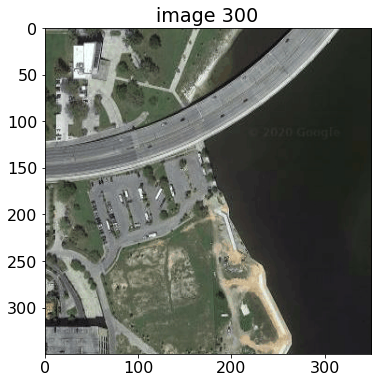

Wild Camping_closed
MS
Established Campground_closed
MS
Water_closed
MS
Showers_closed
MS
Wild Camping_deleted
MS
Pulling image 439, total API requests so far = 0
satimg_MS_439_Wild Camping_deleted_17_34.532268_-89.45814200000001.png
waiting for: 2 seconds
Informal Campsite_deleted
MS
Pulling image 759, total API requests so far = 0
satimg_MS_759_Informal Campsite_deleted_17_30.462661999999998_-88.435347.png
waiting for: 5 seconds
Established Campground_deleted
MS
Water_deleted
MS
Informal Campsite_closed_deleted
MS
Pulling image 337, total API requests so far = 0
satimg_MS_337_Informal Campsite_closed_deleted_17_30.397_-88.86158.png
waiting for: 1 seconds
Wild Camping_closed_deleted
MS
Pulling image 305, total API requests so far = 0
satimg_MS_305_Wild Camping_closed_deleted_17_30.59569_-88.99114499999999.png
waiting for: 1 seconds
Pulling image 333, total API requests so far = 1
satimg_MS_333_Wild Camping_closed_deleted_17_30.359419_-89.109215.png
waiting for: 2 seconds
Established C

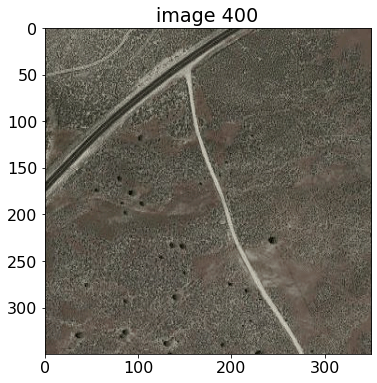

Pulling image 484, total API requests so far = 7
satimg_NV_484_Wild Camping_closed_17_39.244186_-119.81074.png
waiting for: 5 seconds
Pulling image 629, total API requests so far = 8
satimg_NV_629_Wild Camping_closed_17_36.054012_-115.246004.png
waiting for: 2 seconds
Established Campground_closed
NV
Pulling image 442, total API requests so far = 0
satimg_NV_442_Established Campground_closed_17_36.440422_-115.35751599999999.png
waiting for: 3 seconds
Pulling image 517, total API requests so far = 1
satimg_NV_517_Established Campground_closed_17_40.78844_-117.1295.png
waiting for: 1 seconds
Pulling image 618, total API requests so far = 2
satimg_NV_618_Established Campground_closed_17_36.036636_-114.801156.png
waiting for: 3 seconds
Pulling image 650, total API requests so far = 3
satimg_NV_650_Established Campground_closed_17_35.49415_-114.687021.png
waiting for: 5 seconds
Water_closed
NV
Pulling image 587, total API requests so far = 0
satimg_NV_587_Water_closed_17_40.788736_-117.1294

waiting for: 5 seconds
Water_closed
NE
Showers_closed
NE
Wild Camping_deleted
NE
Informal Campsite_deleted
NE
Pulling image 183, total API requests so far = 0
satimg_NE_183_Informal Campsite_deleted_17_40.728429999999996_-96.79081.png
waiting for: 5 seconds
Pulling image 626, total API requests so far = 1
satimg_NE_626_Informal Campsite_deleted_17_40.82101_-97.642707.png
waiting for: 3 seconds
Established Campground_deleted
NE
Water_deleted
NE
Informal Campsite_closed_deleted
NE
Wild Camping_closed_deleted
NE
Pulling image 93, total API requests so far = 0
satimg_NE_93_Wild Camping_closed_deleted_17_40.84618_-98.22531.png
waiting for: 1 seconds
Established Campground_closed_deleted
NE
Water_closed_deleted
NE
Showers_closed_deleted
NE
Informal Campsite_closed
AK
Pulling image 29, total API requests so far = 0
satimg_AK_29_Informal Campsite_closed_17_62.665397_-144.42582.png
waiting for: 4 seconds
Pulling image 315, total API requests so far = 1
satimg_AK_315_Informal Campsite_closed_17_

waiting for: 5 seconds
Pulling image 224, total API requests so far = 3
satimg_AK_224_Water_deleted_17_61.124140000000004_-146.363124.png
waiting for: 2 seconds
Pulling image 253, total API requests so far = 4
satimg_AK_253_Water_deleted_17_60.961026000000004_-149.134805.png
waiting for: 1 seconds
Pulling image 560, total API requests so far = 5
satimg_AK_560_Water_deleted_17_60.12495799999999_-149.43753700000002.png
waiting for: 2 seconds
Informal Campsite_closed_deleted
AK
Pulling image 61, total API requests so far = 0
satimg_AK_61_Informal Campsite_closed_deleted_17_61.14035_-149.86661.png
waiting for: 1 seconds
Pulling image 156, total API requests so far = 1
satimg_AK_156_Informal Campsite_closed_deleted_17_61.19189_-149.88111999999998.png
waiting for: 3 seconds
Pulling image 167, total API requests so far = 2
satimg_AK_167_Informal Campsite_closed_deleted_17_61.013728_-149.713124.png
waiting for: 3 seconds
Wild Camping_closed_deleted
AK
Pulling image 28, total API requests so fa

waiting for: 4 seconds
Informal Campsite_deleted
VT
Established Campground_deleted
VT
Water_deleted
VT
Pulling image 640, total API requests so far = 0
satimg_VT_640_Water_deleted_17_44.329301_-72.57524699999999.png
waiting for: 3 seconds
Informal Campsite_closed_deleted
VT
Wild Camping_closed_deleted
VT
Established Campground_closed_deleted
VT
Water_closed_deleted
VT
Showers_closed_deleted
VT
Informal Campsite_closed
DC
Wild Camping_closed
DC
Pulling image 450, total API requests so far = 0
satimg_DC_450_Wild Camping_closed_17_38.886809_-76.970624.png
waiting for: 3 seconds
Established Campground_closed
DC
Water_closed
DC
Showers_closed
DC
Wild Camping_deleted
DC
Informal Campsite_deleted
DC
Established Campground_deleted
DC
Water_deleted
DC
Informal Campsite_closed_deleted
DC
Wild Camping_closed_deleted
DC
Pulling image 281, total API requests so far = 0
satimg_DC_281_Wild Camping_closed_deleted_17_38.917996_-77.101248.png
waiting for: 4 seconds
Established Campground_closed_deleted


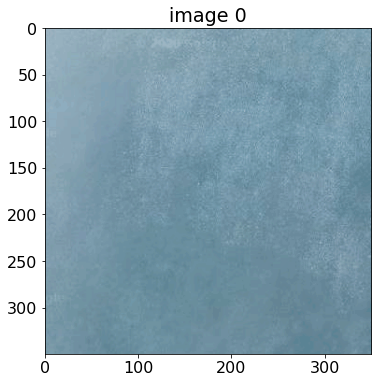

Pulling image 12, total API requests so far = 1
satimg_UT_12_Wild Camping_deleted_17_37.17337_-113.09351000000001.png
waiting for: 5 seconds
Pulling image 40, total API requests so far = 2
satimg_UT_40_Wild Camping_deleted_17_38.54065_-109.70884.png
waiting for: 3 seconds
Pulling image 76, total API requests so far = 3
satimg_UT_76_Wild Camping_deleted_17_41.2676_-111.81945.png
waiting for: 3 seconds
Pulling image 133, total API requests so far = 4
satimg_UT_133_Wild Camping_deleted_17_38.54695_-109.75753.png
waiting for: 5 seconds
Pulling image 146, total API requests so far = 5
satimg_UT_146_Wild Camping_deleted_17_37.229023_-113.159907.png
waiting for: 2 seconds
Pulling image 163, total API requests so far = 6
satimg_UT_163_Wild Camping_deleted_17_37.196616999999996_-113.218015.png
waiting for: 3 seconds
Pulling image 171, total API requests so far = 7
satimg_UT_171_Wild Camping_deleted_17_38.18489_-109.38156000000001.png
waiting for: 3 seconds
Pulling image 289, total API requests 

waiting for: 4 seconds
Pulling image 370, total API requests so far = 12
satimg_UT_370_Wild Camping_closed_deleted_17_40.40424_-111.60479.png
waiting for: 3 seconds
Pulling image 412, total API requests so far = 13
satimg_UT_412_Wild Camping_closed_deleted_17_40.619937_-111.793029.png
waiting for: 4 seconds
Pulling image 452, total API requests so far = 14
satimg_UT_452_Wild Camping_closed_deleted_17_40.725390000000004_-112.22768.png
waiting for: 4 seconds
Pulling image 465, total API requests so far = 15
satimg_UT_465_Wild Camping_closed_deleted_17_40.128009999999996_-111.02537.png
waiting for: 3 seconds
Established Campground_closed_deleted
UT
Pulling image 436, total API requests so far = 0
satimg_UT_436_Established Campground_closed_deleted_17_37.169778_-113.396831.png
waiting for: 3 seconds
Water_closed_deleted
UT
Showers_closed_deleted
UT
Informal Campsite_closed
IL
Pulling image 66, total API requests so far = 0
satimg_IL_66_Informal Campsite_closed_17_39.718059999999994_-91.350

waiting for: 1 seconds
Pulling image 651, total API requests so far = 15
satimg_FL_651_Wild Camping_closed_17_24.562929999999998_-81.79854.png
waiting for: 3 seconds
Pulling image 652, total API requests so far = 16
satimg_FL_652_Wild Camping_closed_17_26.230357_-80.091865.png
waiting for: 5 seconds
Pulling image 656, total API requests so far = 17
satimg_FL_656_Wild Camping_closed_17_27.496108000000003_-82.647638.png
waiting for: 3 seconds
Established Campground_closed
FL
Pulling image 67, total API requests so far = 0
satimg_FL_67_Established Campground_closed_17_30.31751_-87.26196.png
waiting for: 3 seconds
Pulling image 178, total API requests so far = 1
satimg_FL_178_Established Campground_closed_17_29.773512_-85.406226.png
waiting for: 2 seconds
Pulling image 235, total API requests so far = 2
satimg_FL_235_Established Campground_closed_17_30.334121000000003_-83.151886.png
waiting for: 4 seconds
Pulling image 543, total API requests so far = 3
satimg_FL_543_Established Campground

waiting for: 1 seconds
Pulling image 317, total API requests so far = 13
satimg_FL_317_Informal Campsite_closed_deleted_17_26.008020000000002_-80.206226.png
waiting for: 4 seconds
Pulling image 323, total API requests so far = 14
satimg_FL_323_Informal Campsite_closed_deleted_17_25.607449_-80.344724.png
waiting for: 2 seconds
Pulling image 324, total API requests so far = 15
satimg_FL_324_Informal Campsite_closed_deleted_17_26.228943_-80.154792.png
waiting for: 1 seconds
Pulling image 335, total API requests so far = 16
satimg_FL_335_Informal Campsite_closed_deleted_17_24.712674_-81.084727.png
waiting for: 1 seconds
Pulling image 350, total API requests so far = 17
satimg_FL_350_Informal Campsite_closed_deleted_17_25.606462_-80.34657800000001.png
waiting for: 5 seconds
Pulling image 379, total API requests so far = 18
satimg_FL_379_Informal Campsite_closed_deleted_17_29.829257000000002_-81.272074.png
waiting for: 4 seconds
Pulling image 430, total API requests so far = 19
satimg_FL_430

Pulling image 388, total API requests so far = 12
satimg_AZ_388_Wild Camping_closed_17_35.980224_-114.698306.png
waiting for: 4 seconds
Pulling image 395, total API requests so far = 13
satimg_AZ_395_Wild Camping_closed_17_34.571546000000005_-114.376475.png
waiting for: 4 seconds
Pulling image 397, total API requests so far = 14
satimg_AZ_397_Wild Camping_closed_17_35.192042_-111.615249.png
waiting for: 1 seconds
Pulling image 432, total API requests so far = 15
satimg_AZ_432_Wild Camping_closed_17_35.98953_-112.12454.png
waiting for: 2 seconds
Pulling image 441, total API requests so far = 16
satimg_AZ_441_Wild Camping_closed_17_31.392569_-110.68558999999999.png
waiting for: 4 seconds
Pulling image 446, total API requests so far = 17
satimg_AZ_446_Wild Camping_closed_17_35.187090000000005_-111.7343.png
waiting for: 1 seconds
Pulling image 464, total API requests so far = 18
satimg_AZ_464_Wild Camping_closed_17_36.980277_-111.556868.png
waiting for: 3 seconds
Pulling image 527, total A

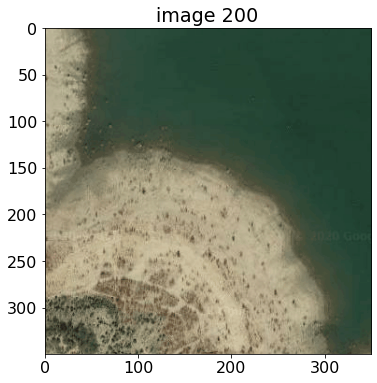

Pulling image 292, total API requests so far = 4
satimg_AZ_292_Established Campground_closed_17_34.998308_-111.739515.png
waiting for: 2 seconds
Pulling image 503, total API requests so far = 5
satimg_AZ_503_Established Campground_closed_17_35.013071000000004_-111.737541.png
waiting for: 4 seconds
Pulling image 547, total API requests so far = 6
satimg_AZ_547_Established Campground_closed_17_36.211818_-112.05980600000001.png
waiting for: 3 seconds
Water_closed
AZ
Pulling image 413, total API requests so far = 0
satimg_AZ_413_Water_closed_17_35.192864_-114.071775.png
waiting for: 4 seconds
Pulling image 614, total API requests so far = 1
satimg_AZ_614_Water_closed_17_34.738946_-112.01008.png
waiting for: 2 seconds
Pulling image 647, total API requests so far = 2
satimg_AZ_647_Water_closed_17_33.6738_-114.2168.png
waiting for: 2 seconds
Showers_closed
AZ
Wild Camping_deleted
AZ
Pulling image 18, total API requests so far = 0
satimg_AZ_18_Wild Camping_deleted_17_34.88216_-111.711.png
wait

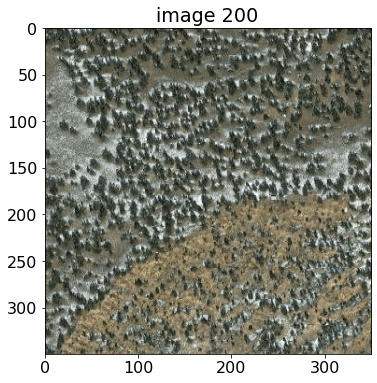

Pulling image 478, total API requests so far = 11
satimg_AZ_478_Wild Camping_deleted_17_34.805777_-111.920151.png
waiting for: 5 seconds
Pulling image 479, total API requests so far = 12
satimg_AZ_479_Wild Camping_deleted_17_34.806646_-111.92203700000002.png
waiting for: 5 seconds
Pulling image 494, total API requests so far = 13
satimg_AZ_494_Wild Camping_deleted_17_32.270681_-110.89173899999999.png
waiting for: 4 seconds
Pulling image 504, total API requests so far = 14
satimg_AZ_504_Wild Camping_deleted_17_34.168362_-113.02526599999999.png
waiting for: 5 seconds
Pulling image 524, total API requests so far = 15
satimg_AZ_524_Wild Camping_deleted_17_33.544281_-111.63568500000001.png
waiting for: 3 seconds
Pulling image 562, total API requests so far = 16
satimg_AZ_562_Wild Camping_deleted_17_35.045411_-114.35986799999999.png
waiting for: 1 seconds
Pulling image 563, total API requests so far = 17
satimg_AZ_563_Wild Camping_deleted_17_35.967335_-112.115726.png
waiting for: 4 seconds
P

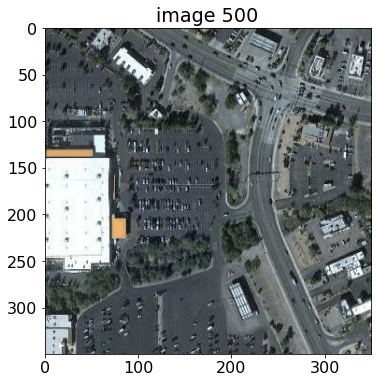

Pulling image 503, total API requests so far = 6
satimg_AZ_503_Informal Campsite_deleted_17_36.161716999999996_-109.58521999999999.png
waiting for: 2 seconds
Pulling image 507, total API requests so far = 7
satimg_AZ_507_Informal Campsite_deleted_17_33.47126_-112.221345.png
waiting for: 2 seconds
Pulling image 509, total API requests so far = 8
satimg_AZ_509_Informal Campsite_deleted_17_33.478903_-111.475963.png
waiting for: 2 seconds
Pulling image 723, total API requests so far = 9
satimg_AZ_723_Informal Campsite_deleted_17_35.221484999999994_-114.034081.png
waiting for: 5 seconds
Pulling image 737, total API requests so far = 10
satimg_AZ_737_Informal Campsite_deleted_17_33.909469_-112.67544699999999.png
waiting for: 5 seconds
Pulling image 749, total API requests so far = 11
satimg_AZ_749_Informal Campsite_deleted_17_31.91323_-110.98245.png
waiting for: 2 seconds
Established Campground_deleted
AZ
Pulling image 166, total API requests so far = 0
satimg_AZ_166_Established Campground_d

waiting for: 3 seconds
Pulling image 604, total API requests so far = 1
satimg_SD_604_Informal Campsite_closed_17_44.033587_-103.21595400000001.png
waiting for: 3 seconds
Wild Camping_closed
SD
Pulling image 495, total API requests so far = 0
satimg_SD_495_Wild Camping_closed_17_43.777777_-103.502411.png
waiting for: 2 seconds
Pulling image 565, total API requests so far = 1
satimg_SD_565_Wild Camping_closed_17_43.81054_-103.59226.png
waiting for: 1 seconds
Pulling image 591, total API requests so far = 2
satimg_SD_591_Wild Camping_closed_17_43.730052_-103.53689.png
waiting for: 4 seconds
Established Campground_closed
SD
Pulling image 485, total API requests so far = 0
satimg_SD_485_Established Campground_closed_17_43.01617_-98.70376999999999.png
waiting for: 3 seconds
Pulling image 533, total API requests so far = 1
satimg_SD_533_Established Campground_closed_17_43.88751_-103.46951999999999.png
waiting for: 3 seconds
Water_closed
SD
Showers_closed
SD
Wild Camping_deleted
SD
Pulling im

waiting for: 3 seconds
Informal Campsite_deleted
WY
Pulling image 108, total API requests so far = 0
satimg_WY_108_Informal Campsite_deleted_17_43.02455_-110.10278999999998.png
waiting for: 1 seconds
Pulling image 188, total API requests so far = 1
satimg_WY_188_Informal Campsite_deleted_17_44.49633_-109.94386000000002.png
waiting for: 4 seconds
Pulling image 318, total API requests so far = 2
satimg_WY_318_Informal Campsite_deleted_17_42.429158_-106.407086.png
waiting for: 1 seconds
Pulling image 379, total API requests so far = 3
satimg_WY_379_Informal Campsite_deleted_17_43.471686_-110.789271.png
waiting for: 3 seconds
Pulling image 460, total API requests so far = 4
satimg_WY_460_Informal Campsite_deleted_17_44.214292_-106.15778.png
waiting for: 3 seconds
Pulling image 833, total API requests so far = 5
satimg_WY_833_Informal Campsite_deleted_17_43.210751_-108.62014199999999.png
waiting for: 3 seconds
Established Campground_deleted
WY
Pulling image 20, total API requests so far = 0

waiting for: 2 seconds
Pulling image 308, total API requests so far = 2
satimg_TX_308_Informal Campsite_deleted_17_32.029045_-95.281113.png
waiting for: 4 seconds
Pulling image 324, total API requests so far = 3
satimg_TX_324_Informal Campsite_deleted_17_31.836805_-106.565804.png
waiting for: 5 seconds
Pulling image 376, total API requests so far = 4
satimg_TX_376_Informal Campsite_deleted_17_31.77601_-106.385368.png
waiting for: 2 seconds
Pulling image 461, total API requests so far = 5
satimg_TX_461_Informal Campsite_deleted_17_30.15268_-103.28761.png
waiting for: 4 seconds
Pulling image 462, total API requests so far = 6
satimg_TX_462_Informal Campsite_deleted_17_30.371376_-103.664546.png
waiting for: 1 seconds
Pulling image 496, total API requests so far = 7
satimg_TX_496_Informal Campsite_deleted_17_29.328778999999997_-96.123141.png
waiting for: 2 seconds
Pulling image 502, total API requests so far = 8
satimg_TX_502_Informal Campsite_deleted_17_32.453126_-100.392702.png
waiting f

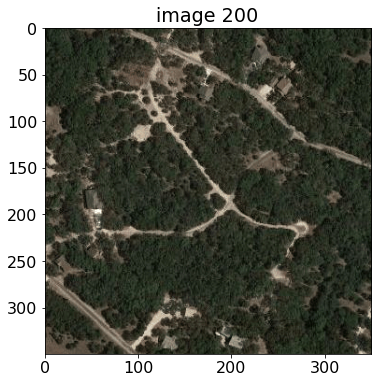

Pulling image 332, total API requests so far = 1
satimg_TX_332_Wild Camping_closed_deleted_17_32.700389_-95.556576.png
waiting for: 4 seconds
Pulling image 346, total API requests so far = 2
satimg_TX_346_Wild Camping_closed_deleted_17_30.886882_-102.064015.png
waiting for: 3 seconds
Pulling image 353, total API requests so far = 3
satimg_TX_353_Wild Camping_closed_deleted_17_28.881888_-99.113288.png
waiting for: 4 seconds
Pulling image 384, total API requests so far = 4
satimg_TX_384_Wild Camping_closed_deleted_17_29.383084999999998_-98.757543.png
waiting for: 2 seconds
Established Campground_closed_deleted
TX
Pulling image 431, total API requests so far = 0
satimg_TX_431_Established Campground_closed_deleted_17_33.267720000000004_-96.59451999999999.png
waiting for: 2 seconds
Water_closed_deleted
TX
Showers_closed_deleted
TX
Informal Campsite_closed
ID
Pulling image 281, total API requests so far = 0
satimg_ID_281_Informal Campsite_closed_17_47.707433_-116.864674.png
waiting for: 1 se

waiting for: 2 seconds
Water_closed
WV
Showers_closed
WV
Wild Camping_deleted
WV
Informal Campsite_deleted
WV
Pulling image 357, total API requests so far = 0
satimg_WV_357_Informal Campsite_deleted_17_39.67901_-79.76915.png
waiting for: 1 seconds
Established Campground_deleted
WV
Water_deleted
WV
Informal Campsite_closed_deleted
WV
Pulling image 429, total API requests so far = 0
satimg_WV_429_Informal Campsite_closed_deleted_17_38.620518_-80.900118.png
waiting for: 5 seconds
Wild Camping_closed_deleted
WV
Established Campground_closed_deleted
WV
Water_closed_deleted
WV
Showers_closed_deleted
WV
Informal Campsite_closed
ME
Pulling image 341, total API requests so far = 0
satimg_ME_341_Informal Campsite_closed_17_43.60372_-70.37015.png
waiting for: 4 seconds
Pulling image 518, total API requests so far = 1
satimg_ME_518_Informal Campsite_closed_17_44.382127000000004_-68.204863.png
waiting for: 3 seconds
Wild Camping_closed
ME
Pulling image 288, total API requests so far = 0
satimg_ME_2

waiting for: 1 seconds
Established Campground_closed
NJ
Water_closed
NJ
Pulling image 431, total API requests so far = 0
satimg_NJ_431_Water_closed_17_40.435284_-74.64071700000001.png
waiting for: 2 seconds
Showers_closed
NJ
Wild Camping_deleted
NJ
Pulling image 659, total API requests so far = 0
satimg_NJ_659_Wild Camping_deleted_17_40.64127_-74.98754100000001.png
waiting for: 2 seconds
Informal Campsite_deleted
NJ
Pulling image 710, total API requests so far = 0
satimg_NJ_710_Informal Campsite_deleted_17_39.661443_-74.962356.png
waiting for: 1 seconds
Established Campground_deleted
NJ
Water_deleted
NJ
Informal Campsite_closed_deleted
NJ
Wild Camping_closed_deleted
NJ
Established Campground_closed_deleted
NJ
Water_closed_deleted
NJ
Showers_closed_deleted
NJ
Informal Campsite_closed
OK
Pulling image 402, total API requests so far = 0
satimg_OK_402_Informal Campsite_closed_17_36.957074_-102.956911.png
waiting for: 3 seconds
Wild Camping_closed
OK
Pulling image 88, total API requests so 

Wild Camping_closed_deleted
MA
Pulling image 374, total API requests so far = 0
satimg_MA_374_Wild Camping_closed_deleted_17_42.682865_-72.40391.png
waiting for: 1 seconds
Pulling image 447, total API requests so far = 1
satimg_MA_447_Wild Camping_closed_deleted_17_41.703881_-70.61655.png
waiting for: 1 seconds
Pulling image 460, total API requests so far = 2
satimg_MA_460_Wild Camping_closed_deleted_17_42.365393_-71.13624.png
waiting for: 1 seconds
Established Campground_closed_deleted
MA
Water_closed_deleted
MA
Showers_closed_deleted
MA
Informal Campsite_closed
CA
Pulling image 2, total API requests so far = 0
satimg_CA_2_Informal Campsite_closed_17_41.09215_-124.15018.png
waiting for: 5 seconds
Pulling image 13, total API requests so far = 1
satimg_CA_13_Informal Campsite_closed_17_39.303670000000004_-123.78438.png
waiting for: 4 seconds
Pulling image 47, total API requests so far = 2
satimg_CA_47_Informal Campsite_closed_17_37.762803000000005_-122.27147099999999.png
waiting for: 5 

waiting for: 3 seconds
Pulling image 472, total API requests so far = 54
satimg_CA_472_Informal Campsite_closed_17_39.583022_-123.44431599999999.png
waiting for: 3 seconds
Pulling image 474, total API requests so far = 55
satimg_CA_474_Informal Campsite_closed_17_38.243390000000005_-122.62872.png
waiting for: 5 seconds
Pulling image 494, total API requests so far = 56
satimg_CA_494_Informal Campsite_closed_17_34.61293_-120.18916999999999.png
waiting for: 3 seconds
Pulling image 526, total API requests so far = 57
satimg_CA_526_Informal Campsite_closed_17_35.24985_-120.68826000000001.png
waiting for: 4 seconds
Pulling image 540, total API requests so far = 58
satimg_CA_540_Informal Campsite_closed_17_38.24123_-121.99.png
waiting for: 2 seconds
Pulling image 572, total API requests so far = 59
satimg_CA_572_Informal Campsite_closed_17_35.129611_-118.464849.png
waiting for: 5 seconds
Pulling image 583, total API requests so far = 60
satimg_CA_583_Informal Campsite_closed_17_37.80438_-122.

waiting for: 4 seconds
Pulling image 375, total API requests so far = 44
satimg_CA_375_Wild Camping_closed_17_34.443937_-118.60903799999998.png
waiting for: 1 seconds
Pulling image 379, total API requests so far = 45
satimg_CA_379_Wild Camping_closed_17_37.679320000000004_-119.76043.png
waiting for: 3 seconds
Pulling image 384, total API requests so far = 46
satimg_CA_384_Wild Camping_closed_17_40.872265999999996_-121.89546499999999.png
waiting for: 2 seconds
Pulling image 389, total API requests so far = 47
satimg_CA_389_Wild Camping_closed_17_41.77055_-124.10516000000001.png
waiting for: 1 seconds
Pulling image 391, total API requests so far = 48
satimg_CA_391_Wild Camping_closed_17_36.600570000000005_-121.89993999999999.png
waiting for: 4 seconds
Pulling image 398, total API requests so far = 49
satimg_CA_398_Wild Camping_closed_17_33.044166_-117.29668000000001.png
waiting for: 5 seconds
Pulling image 417, total API requests so far = 50
satimg_CA_417_Wild Camping_closed_17_32.745565

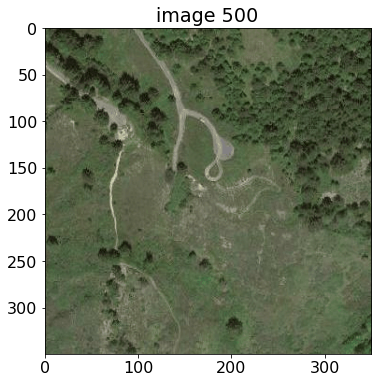

Pulling image 514, total API requests so far = 60
satimg_CA_514_Wild Camping_closed_17_36.55558_-121.92788999999999.png
waiting for: 5 seconds
Pulling image 522, total API requests so far = 61
satimg_CA_522_Wild Camping_closed_17_32.893570000000004_-117.25111000000001.png
waiting for: 2 seconds
Pulling image 523, total API requests so far = 62
satimg_CA_523_Wild Camping_closed_17_41.03719_-124.11806000000001.png
waiting for: 4 seconds
Pulling image 525, total API requests so far = 63
satimg_CA_525_Wild Camping_closed_17_38.365025_-123.07077199999999.png
waiting for: 4 seconds
Pulling image 552, total API requests so far = 64
satimg_CA_552_Wild Camping_closed_17_37.93675_-122.68842.png
waiting for: 2 seconds
Pulling image 557, total API requests so far = 65
satimg_CA_557_Wild Camping_closed_17_39.35653_-123.73631.png
waiting for: 1 seconds
Pulling image 578, total API requests so far = 66
satimg_CA_578_Wild Camping_closed_17_34.468225_-120.110684.png
waiting for: 3 seconds
Pulling image

waiting for: 4 seconds
Pulling image 128, total API requests so far = 19
satimg_CA_128_Wild Camping_deleted_17_36.97548_-120.08285.png
waiting for: 1 seconds
Pulling image 129, total API requests so far = 20
satimg_CA_129_Wild Camping_deleted_17_36.5652_-116.99927.png
waiting for: 4 seconds
Pulling image 140, total API requests so far = 21
satimg_CA_140_Wild Camping_deleted_17_32.69109_-117.16611.png
waiting for: 2 seconds
Pulling image 142, total API requests so far = 22
satimg_CA_142_Wild Camping_deleted_17_38.959969_-123.71468600000001.png
waiting for: 1 seconds
Pulling image 148, total API requests so far = 23
satimg_CA_148_Wild Camping_deleted_17_39.77715_-123.83514.png
waiting for: 4 seconds
Pulling image 159, total API requests so far = 24
satimg_CA_159_Wild Camping_deleted_17_37.067378000000005_-122.255817.png
waiting for: 4 seconds
Pulling image 164, total API requests so far = 25
satimg_CA_164_Wild Camping_deleted_17_32.742164_-117.17228100000001.png
waiting for: 5 seconds
Pu

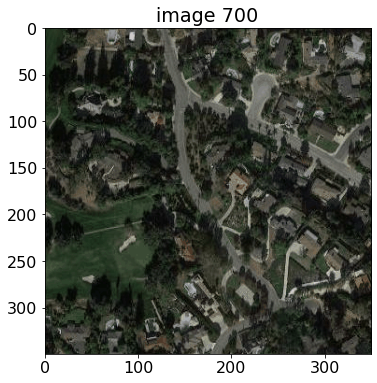

Pulling image 709, total API requests so far = 73
satimg_CA_709_Wild Camping_deleted_17_36.613577_-121.93041399999998.png
waiting for: 4 seconds
Pulling image 712, total API requests so far = 74
satimg_CA_712_Wild Camping_deleted_17_41.514459_-122.237572.png
waiting for: 4 seconds
Pulling image 720, total API requests so far = 75
satimg_CA_720_Wild Camping_deleted_17_35.901633000000004_-116.281122.png
waiting for: 2 seconds
Pulling image 725, total API requests so far = 76
satimg_CA_725_Wild Camping_deleted_17_33.758275_-118.143831.png
waiting for: 5 seconds
Pulling image 730, total API requests so far = 77
satimg_CA_730_Wild Camping_deleted_17_36.734833_-121.79360600000001.png
waiting for: 2 seconds
Pulling image 735, total API requests so far = 78
satimg_CA_735_Wild Camping_deleted_17_33.995274_-118.47936000000001.png
waiting for: 1 seconds
Pulling image 755, total API requests so far = 79
satimg_CA_755_Wild Camping_deleted_17_38.933589000000005_-120.06480400000001.png
waiting for: 2

waiting for: 3 seconds
Pulling image 380, total API requests so far = 40
satimg_CA_380_Informal Campsite_deleted_17_37.389006_-121.98561200000002.png
waiting for: 1 seconds
Pulling image 394, total API requests so far = 41
satimg_CA_394_Informal Campsite_deleted_17_33.460617_-117.692604.png
waiting for: 4 seconds
Pulling image 402, total API requests so far = 42
satimg_CA_402_Informal Campsite_deleted_17_40.269474_-122.27008400000001.png
waiting for: 5 seconds
Pulling image 405, total API requests so far = 43
satimg_CA_405_Informal Campsite_deleted_17_38.45281_-122.66911699999999.png
waiting for: 4 seconds
Pulling image 406, total API requests so far = 44
satimg_CA_406_Informal Campsite_deleted_17_39.412728_-123.34676599999999.png
waiting for: 4 seconds
Pulling image 417, total API requests so far = 45
satimg_CA_417_Informal Campsite_deleted_17_32.761084999999994_-117.24555.png
waiting for: 1 seconds
Pulling image 426, total API requests so far = 46
satimg_CA_426_Informal Campsite_dele

waiting for: 4 seconds
Pulling image 149, total API requests so far = 1
satimg_CA_149_Water_deleted_17_34.128708_-116.037209.png
waiting for: 2 seconds
Pulling image 220, total API requests so far = 2
satimg_CA_220_Water_deleted_17_37.326588_-119.016999.png
waiting for: 3 seconds
Pulling image 237, total API requests so far = 3
satimg_CA_237_Water_deleted_17_36.677223_-119.73723799999999.png
waiting for: 1 seconds
Pulling image 240, total API requests so far = 4
satimg_CA_240_Water_deleted_17_37.698178999999996_-121.9035.png
waiting for: 3 seconds
Pulling image 245, total API requests so far = 5
satimg_CA_245_Water_deleted_17_37.958856_-119.12126799999999.png
waiting for: 5 seconds
Pulling image 259, total API requests so far = 6
satimg_CA_259_Water_deleted_17_35.850284_-120.77054299999999.png
waiting for: 2 seconds
Pulling image 270, total API requests so far = 7
satimg_CA_270_Water_deleted_17_34.128888_-116.037186.png
waiting for: 1 seconds
Pulling image 276, total API requests so fa

waiting for: 4 seconds
Pulling image 220, total API requests so far = 43
satimg_CA_220_Informal Campsite_closed_deleted_17_38.78731_-121.29172.png
waiting for: 4 seconds
Pulling image 247, total API requests so far = 44
satimg_CA_247_Informal Campsite_closed_deleted_17_38.477965999999995_-123.16274299999999.png
waiting for: 3 seconds
Pulling image 249, total API requests so far = 45
satimg_CA_249_Informal Campsite_closed_deleted_17_33.021522999999995_-117.28433100000001.png
waiting for: 5 seconds
Pulling image 250, total API requests so far = 46
satimg_CA_250_Informal Campsite_closed_deleted_17_32.82247_-116.90189.png
waiting for: 4 seconds
Pulling image 257, total API requests so far = 47
satimg_CA_257_Informal Campsite_closed_deleted_17_34.40887_-119.84263999999999.png
waiting for: 1 seconds
Pulling image 285, total API requests so far = 48
satimg_CA_285_Informal Campsite_closed_deleted_17_41.741566999999996_-123.980928.png
waiting for: 3 seconds
Pulling image 289, total API requests

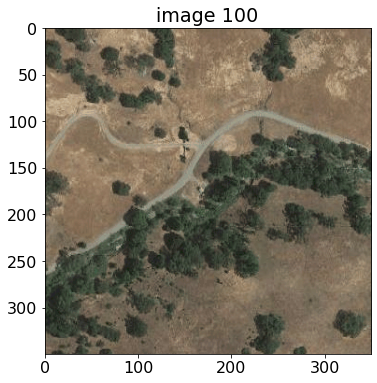

Pulling image 101, total API requests so far = 15
satimg_CA_101_Wild Camping_closed_deleted_17_40.06231_-123.77948.png
waiting for: 3 seconds
Pulling image 104, total API requests so far = 16
satimg_CA_104_Wild Camping_closed_deleted_17_36.74378_-119.06038999999998.png
waiting for: 4 seconds
Pulling image 118, total API requests so far = 17
satimg_CA_118_Wild Camping_closed_deleted_17_38.6991_-123.41258.png
waiting for: 1 seconds
Pulling image 133, total API requests so far = 18
satimg_CA_133_Wild Camping_closed_deleted_17_39.56608_-123.7687.png
waiting for: 2 seconds
Pulling image 135, total API requests so far = 19
satimg_CA_135_Wild Camping_closed_deleted_17_35.3106_-120.82547.png
waiting for: 5 seconds
Pulling image 136, total API requests so far = 20
satimg_CA_136_Wild Camping_closed_deleted_17_38.095009999999995_-122.82965.png
waiting for: 2 seconds
Pulling image 163, total API requests so far = 21
satimg_CA_163_Wild Camping_closed_deleted_17_34.43052_-118.58926000000001.png
wait

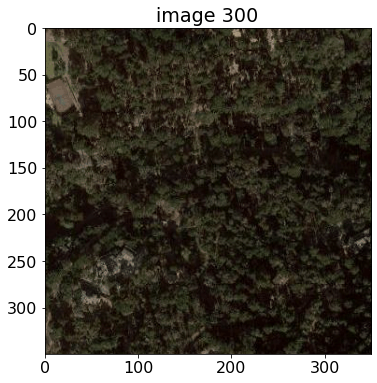

Pulling image 325, total API requests so far = 36
satimg_CA_325_Wild Camping_closed_deleted_17_33.975237_-118.462221.png
waiting for: 3 seconds
Pulling image 326, total API requests so far = 37
satimg_CA_326_Wild Camping_closed_deleted_17_35.14283_-120.64487.png
waiting for: 4 seconds
Pulling image 327, total API requests so far = 38
satimg_CA_327_Wild Camping_closed_deleted_17_37.766558_-122.51078999999999.png
waiting for: 1 seconds
Pulling image 340, total API requests so far = 39
satimg_CA_340_Wild Camping_closed_deleted_17_32.95109_-115.28428000000001.png
waiting for: 1 seconds
Pulling image 342, total API requests so far = 40
satimg_CA_342_Wild Camping_closed_deleted_17_35.37141_-120.86456000000001.png
waiting for: 3 seconds
Pulling image 349, total API requests so far = 41
satimg_CA_349_Wild Camping_closed_deleted_17_32.767734000000004_-117.250736.png
waiting for: 5 seconds
Pulling image 354, total API requests so far = 42
satimg_CA_354_Wild Camping_closed_deleted_17_34.371051_-1

waiting for: 3 seconds
Pulling image 91, total API requests so far = 1
satimg_CO_91_Wild Camping_closed_17_39.652402_-106.783528.png
waiting for: 3 seconds
Pulling image 119, total API requests so far = 2
satimg_CO_119_Wild Camping_closed_17_40.526029_-106.75627800000001.png
waiting for: 5 seconds
Pulling image 219, total API requests so far = 3
satimg_CO_219_Wild Camping_closed_17_39.50832_-105.559152.png
waiting for: 2 seconds
Pulling image 250, total API requests so far = 4
satimg_CO_250_Wild Camping_closed_17_40.050418_-106.13025800000001.png
waiting for: 4 seconds
Pulling image 252, total API requests so far = 5
satimg_CO_252_Wild Camping_closed_17_39.76321_-105.59993999999999.png
waiting for: 4 seconds
Pulling image 258, total API requests so far = 6
satimg_CO_258_Wild Camping_closed_17_39.452746999999995_-106.020647.png
waiting for: 4 seconds
Pulling image 278, total API requests so far = 7
satimg_CO_278_Wild Camping_closed_17_40.30608_-105.5372.png
waiting for: 1 seconds
Pullin

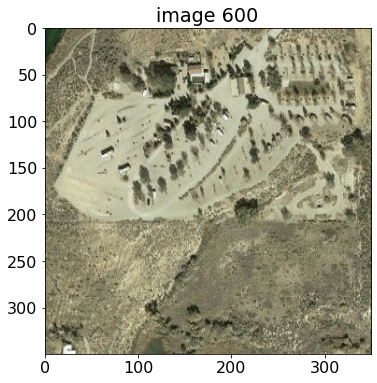

Pulling image 701, total API requests so far = 2
satimg_CO_701_Established Campground_deleted_17_37.9405_-107.8987.png
waiting for: 5 seconds
Pulling image 775, total API requests so far = 3
satimg_CO_775_Established Campground_deleted_17_37.94064_-107.89811.png
waiting for: 4 seconds
Water_deleted
CO
Pulling image 181, total API requests so far = 0
satimg_CO_181_Water_deleted_17_37.471868_-108.508086.png
waiting for: 2 seconds
Pulling image 343, total API requests so far = 1
satimg_CO_343_Water_deleted_17_39.566562_-106.052269.png
waiting for: 2 seconds
Pulling image 638, total API requests so far = 2
satimg_CO_638_Water_deleted_17_39.163771999999994_-108.302426.png
waiting for: 2 seconds
Informal Campsite_closed_deleted
CO
Pulling image 40, total API requests so far = 0
satimg_CO_40_Informal Campsite_closed_deleted_17_39.52064_-107.31951000000001.png
waiting for: 1 seconds
Pulling image 46, total API requests so far = 1
satimg_CO_46_Informal Campsite_closed_deleted_17_40.366681_-105.

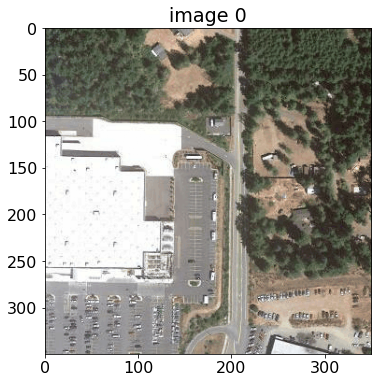

Pulling image 51, total API requests so far = 1
satimg_WA_51_Informal Campsite_closed_17_46.71351_-117.17441000000001.png
waiting for: 2 seconds
Pulling image 72, total API requests so far = 2
satimg_WA_72_Informal Campsite_closed_17_47.648862_-122.936118.png
waiting for: 1 seconds
Pulling image 129, total API requests so far = 3
satimg_WA_129_Informal Campsite_closed_17_48.692231_-121.680865.png
waiting for: 2 seconds
Pulling image 199, total API requests so far = 4
satimg_WA_199_Informal Campsite_closed_17_47.044134_-122.90693300000001.png
waiting for: 5 seconds
Pulling image 215, total API requests so far = 5
satimg_WA_215_Informal Campsite_closed_17_47.68018_-124.40431000000001.png
waiting for: 3 seconds
Pulling image 237, total API requests so far = 6
satimg_WA_237_Informal Campsite_closed_17_47.923307_-122.28908899999999.png
waiting for: 1 seconds
Pulling image 310, total API requests so far = 7
satimg_WA_310_Informal Campsite_closed_17_46.975169_-123.808929.png
waiting for: 2 se

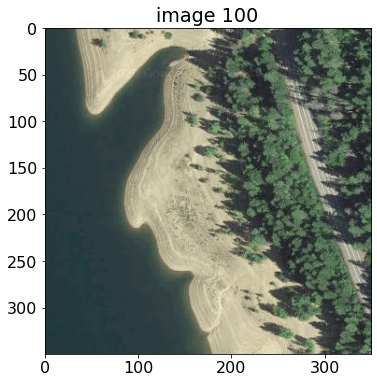

Pulling image 186, total API requests so far = 9
satimg_WA_186_Wild Camping_deleted_17_46.773354_-121.74426799999999.png
waiting for: 3 seconds
Pulling image 199, total API requests so far = 10
satimg_WA_199_Wild Camping_deleted_17_47.627501_-122.31671999999999.png
waiting for: 1 seconds
Pulling image 282, total API requests so far = 11
satimg_WA_282_Wild Camping_deleted_17_47.6313_-122.31255900000001.png
waiting for: 4 seconds
Pulling image 298, total API requests so far = 12
satimg_WA_298_Wild Camping_deleted_17_48.607209999999995_-123.15401999999999.png
waiting for: 1 seconds
Pulling image 321, total API requests so far = 13
satimg_WA_321_Wild Camping_deleted_17_47.788537_-122.906052.png
waiting for: 3 seconds
Pulling image 395, total API requests so far = 14
satimg_WA_395_Wild Camping_deleted_17_46.320012_-117.981357.png
waiting for: 5 seconds
Pulling image 497, total API requests so far = 15
satimg_WA_497_Wild Camping_deleted_17_47.359063_-121.258127.png
waiting for: 3 seconds
Pul

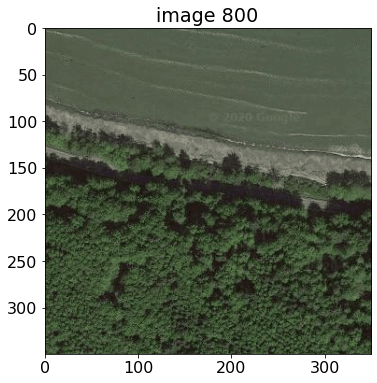

Pulling image 808, total API requests so far = 25
satimg_WA_808_Wild Camping_deleted_17_47.396929_-120.65423200000001.png
waiting for: 2 seconds
Pulling image 820, total API requests so far = 26
satimg_WA_820_Wild Camping_deleted_17_48.066124_-124.241321.png
waiting for: 4 seconds
Pulling image 838, total API requests so far = 27
satimg_WA_838_Wild Camping_deleted_17_47.808526_-124.1018.png
waiting for: 4 seconds
Pulling image 853, total API requests so far = 28
satimg_WA_853_Wild Camping_deleted_17_48.620389_-119.98121200000001.png
waiting for: 1 seconds
Pulling image 857, total API requests so far = 29
satimg_WA_857_Wild Camping_deleted_17_47.011123_-123.144126.png
waiting for: 1 seconds
Pulling image 207, total API requests so far = 30
satimg_WA_207_Wild Camping_deleted_17_48.35711_-124.25566.png
waiting for: 4 seconds
Informal Campsite_deleted
WA
Pulling image 193, total API requests so far = 0
satimg_WA_193_Informal Campsite_deleted_17_47.65842_-117.4131.png
waiting for: 3 seconds

waiting for: 4 seconds
Pulling image 469, total API requests so far = 9
satimg_WA_469_Wild Camping_closed_deleted_17_48.404453000000004_-119.901601.png
waiting for: 2 seconds
Established Campground_closed_deleted
WA
Pulling image 278, total API requests so far = 0
satimg_WA_278_Established Campground_closed_deleted_17_48.137539000000004_-122.28670100000001.png
waiting for: 3 seconds
Pulling image 373, total API requests so far = 1
satimg_WA_373_Established Campground_closed_deleted_17_45.814298_-121.62888400000001.png
waiting for: 1 seconds
Water_closed_deleted
WA
Pulling image 394, total API requests so far = 0
satimg_WA_394_Water_closed_deleted_17_47.49394_-121.78466100000001.png
waiting for: 1 seconds
Showers_closed_deleted
WA
Informal Campsite_closed
NH
Pulling image 87, total API requests so far = 0
satimg_NH_87_Informal Campsite_closed_17_42.885_-70.879998.png
waiting for: 2 seconds
Pulling image 378, total API requests so far = 1
satimg_NH_378_Informal Campsite_closed_17_44.0182

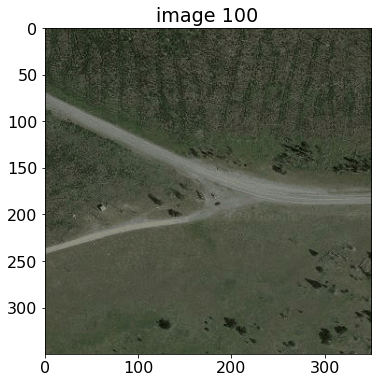

Pulling image 101, total API requests so far = 4
satimg_MT_101_Wild Camping_closed_17_45.822317_-110.814383.png
waiting for: 3 seconds
Pulling image 106, total API requests so far = 5
satimg_MT_106_Wild Camping_closed_17_48.475237_-113.24521000000001.png
waiting for: 4 seconds
Pulling image 122, total API requests so far = 6
satimg_MT_122_Wild Camping_closed_17_48.85369_-113.42408.png
waiting for: 4 seconds
Pulling image 251, total API requests so far = 7
satimg_MT_251_Wild Camping_closed_17_48.73644_-113.38609.png
waiting for: 4 seconds
Pulling image 262, total API requests so far = 8
satimg_MT_262_Wild Camping_closed_17_45.26433_-110.8616.png
waiting for: 4 seconds
Pulling image 303, total API requests so far = 9
satimg_MT_303_Wild Camping_closed_17_44.65456_-111.122518.png
waiting for: 2 seconds
Pulling image 312, total API requests so far = 10
satimg_MT_312_Wild Camping_closed_17_48.725452000000004_-113.41459499999999.png
waiting for: 2 seconds
Pulling image 330, total API requests

waiting for: 3 seconds
Pulling image 185, total API requests so far = 6
satimg_OR_185_Informal Campsite_closed_17_42.066311_-124.302178.png
waiting for: 4 seconds
Pulling image 253, total API requests so far = 7
satimg_OR_253_Informal Campsite_closed_17_42.227589_-124.38326699999999.png
waiting for: 2 seconds
Pulling image 263, total API requests so far = 8
satimg_OR_263_Informal Campsite_closed_17_46.14544_-123.91606999999999.png
waiting for: 2 seconds
Pulling image 269, total API requests so far = 9
satimg_OR_269_Informal Campsite_closed_17_46.047523_-123.928671.png
waiting for: 2 seconds
Pulling image 280, total API requests so far = 10
satimg_OR_280_Informal Campsite_closed_17_45.543890000000005_-122.39641999999999.png
waiting for: 4 seconds
Pulling image 313, total API requests so far = 11
satimg_OR_313_Informal Campsite_closed_17_45.54117_-122.42083999999998.png
waiting for: 3 seconds
Pulling image 334, total API requests so far = 12
satimg_OR_334_Informal Campsite_closed_17_44.7

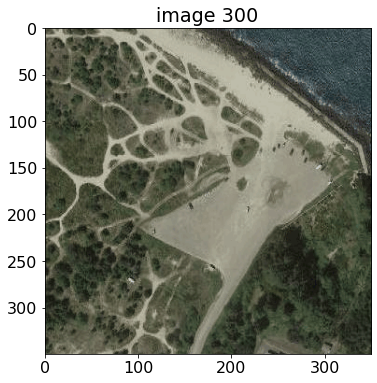

Pulling image 309, total API requests so far = 11
satimg_OR_309_Wild Camping_deleted_17_44.012407_-124.132962.png
waiting for: 1 seconds
Pulling image 312, total API requests so far = 12
satimg_OR_312_Wild Camping_deleted_17_45.548821999999994_-123.52515700000001.png
waiting for: 2 seconds
Pulling image 543, total API requests so far = 13
satimg_OR_543_Wild Camping_deleted_17_45.497489_-121.562726.png
waiting for: 3 seconds
Pulling image 604, total API requests so far = 14
satimg_OR_604_Wild Camping_deleted_17_44.343903999999995_-123.95423100000001.png
waiting for: 4 seconds
Pulling image 610, total API requests so far = 15
satimg_OR_610_Wild Camping_deleted_17_44.054296_-121.30383700000002.png
waiting for: 1 seconds
Pulling image 652, total API requests so far = 16
satimg_OR_652_Wild Camping_deleted_17_44.169607_-124.116642.png
waiting for: 1 seconds
Pulling image 683, total API requests so far = 17
satimg_OR_683_Wild Camping_deleted_17_46.092708_-123.72296200000001.png
waiting for: 1

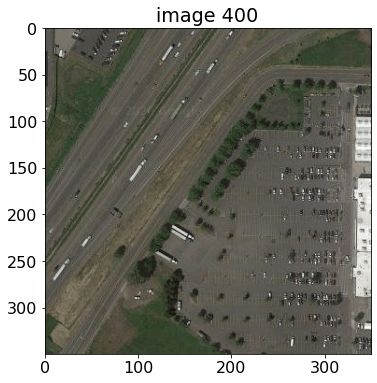

Pulling image 453, total API requests so far = 11
satimg_OR_453_Informal Campsite_deleted_17_43.447322_-123.99558799999998.png
waiting for: 3 seconds
Pulling image 481, total API requests so far = 12
satimg_OR_481_Informal Campsite_deleted_17_45.455462_-122.82679099999999.png
waiting for: 3 seconds
Pulling image 506, total API requests so far = 13
satimg_OR_506_Informal Campsite_deleted_17_42.943511_-123.293117.png
waiting for: 4 seconds
Pulling image 571, total API requests so far = 14
satimg_OR_571_Informal Campsite_deleted_17_43.476248_-123.320485.png
waiting for: 4 seconds
Pulling image 615, total API requests so far = 15
satimg_OR_615_Informal Campsite_deleted_17_44.495166_-117.365877.png
waiting for: 5 seconds
Pulling image 617, total API requests so far = 16
satimg_OR_617_Informal Campsite_deleted_17_44.780965_-117.826274.png
waiting for: 1 seconds
Pulling image 643, total API requests so far = 17
satimg_OR_643_Informal Campsite_deleted_17_44.963853_-122.98451499999999.png
waiti

waiting for: 4 seconds
Pulling image 288, total API requests so far = 15
satimg_OR_288_Wild Camping_closed_deleted_17_44.02725_-123.0459.png
waiting for: 5 seconds
Pulling image 304, total API requests so far = 16
satimg_OR_304_Wild Camping_closed_deleted_17_45.520047999999996_-122.68666999999999.png
waiting for: 4 seconds
Pulling image 330, total API requests so far = 17
satimg_OR_330_Wild Camping_closed_deleted_17_42.713415999999995_-124.461303.png
waiting for: 2 seconds
Pulling image 343, total API requests so far = 18
satimg_OR_343_Wild Camping_closed_deleted_17_45.38375_-122.75418.png
waiting for: 4 seconds
Pulling image 382, total API requests so far = 19
satimg_OR_382_Wild Camping_closed_deleted_17_44.413616999999995_-124.08353899999999.png
waiting for: 1 seconds
Pulling image 386, total API requests so far = 20
satimg_OR_386_Wild Camping_closed_deleted_17_42.168687_-122.78541399999999.png
waiting for: 4 seconds
Pulling image 400, total API requests so far = 21
satimg_OR_400_Wil

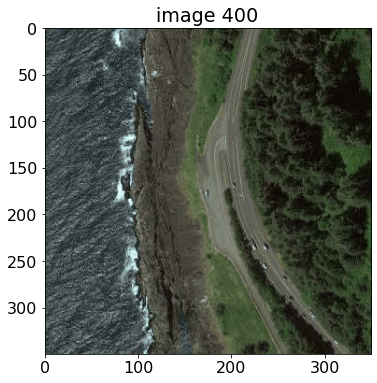

Pulling image 409, total API requests so far = 22
satimg_OR_409_Wild Camping_closed_deleted_17_45.658175_-123.92899399999999.png
waiting for: 4 seconds
Pulling image 421, total API requests so far = 23
satimg_OR_421_Wild Camping_closed_deleted_17_45.842141999999996_-123.957718.png
waiting for: 4 seconds
Pulling image 423, total API requests so far = 24
satimg_OR_423_Wild Camping_closed_deleted_17_45.5406_-122.666.png
waiting for: 4 seconds
Pulling image 424, total API requests so far = 25
satimg_OR_424_Wild Camping_closed_deleted_17_45.314599_-118.363095.png
waiting for: 3 seconds
Established Campground_closed_deleted
OR
Water_closed_deleted
OR
Showers_closed_deleted
OR
Informal Campsite_closed
NC
Pulling image 180, total API requests so far = 0
satimg_NC_180_Informal Campsite_closed_17_36.37488_-81.14367.png
waiting for: 3 seconds
Pulling image 208, total API requests so far = 1
satimg_NC_208_Informal Campsite_closed_17_35.71805_-82.63476.png
waiting for: 2 seconds
Pulling image 221, 

waiting for: 5 seconds
Pulling image 519, total API requests so far = 1
satimg_NM_519_Wild Camping_deleted_17_36.707525_-108.23761200000001.png
waiting for: 3 seconds
Pulling image 828, total API requests so far = 2
satimg_NM_828_Wild Camping_deleted_17_35.472266_-108.461152.png
waiting for: 2 seconds
Informal Campsite_deleted
NM
Pulling image 508, total API requests so far = 0
satimg_NM_508_Informal Campsite_deleted_17_32.9157_-105.96058000000001.png
waiting for: 2 seconds
Pulling image 528, total API requests so far = 1
satimg_NM_528_Informal Campsite_deleted_17_35.103173999999996_-106.604496.png
waiting for: 4 seconds
Established Campground_deleted
NM
Pulling image 86, total API requests so far = 0
satimg_NM_86_Established Campground_deleted_17_36.382007_-105.523857.png
waiting for: 2 seconds
Pulling image 521, total API requests so far = 1
satimg_NM_521_Established Campground_deleted_17_35.661390000000004_-105.232549.png
waiting for: 4 seconds
Pulling image 561, total API requests 

In [133]:
for name, state in zip(names, state_dfs):
    for category in categories:
        print(category)
        tempdf = state[state['Category'] == category]
        #tempdf.info()
        print(name)
        my_funcs.download_images(gmaps, tempdf, max_requests=max_requests, zoomlevel=17, prefix=f'{name}', out_path=f"../data/sat_images/sites_{name}/{category}/", n_requests=n_requests)